<a href="https://colab.research.google.com/github/Abhs1897/Machine-Learning/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification

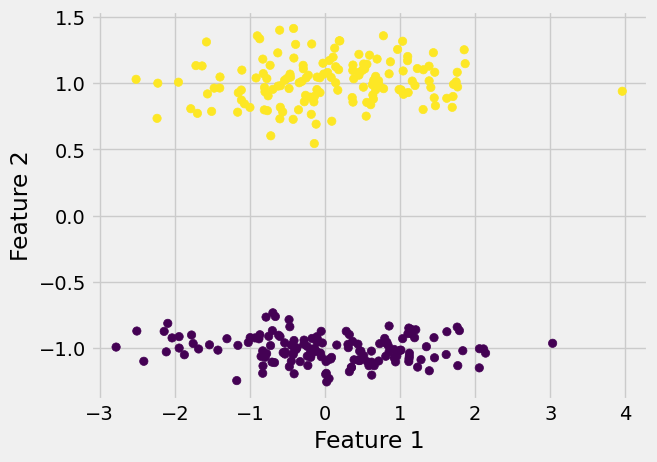

In [19]:
features,targets=make_classification(
    n_samples=300,
    n_features=2,
    n_informative=1,
    n_redundant=0,
    n_clusters_per_class =1,
    random_state=1
)


plt.style.use('fivethirtyeight')
plt.scatter(features[:,0],features[:,1],c=targets)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [20]:
inputs = torch.from_numpy(features).float()
targets = torch.from_numpy(targets).float().unsqueeze(1)

# Split the dataset into train and test
train_inputs = inputs[:200]
train_targets = targets[:200]
test_inputs = inputs[200:]
test_targets = targets[200:]

In [21]:
class LogisticRegression(nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()

        # Define the linear layer with 2 input features and 1 output feature
        self.linear = nn.Linear(2, 1)

        # Define the sigmoid activation function
        self.sigmoid = nn.Sigmoid()

    # Define the forward pass of the model
    def forward(self, x):
        out = self.linear(x) # Pass the input through the linear layer
        out = self.sigmoid(out) # Apply the sigmoid activation function
        return out

model = LogisticRegression()

In [22]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [23]:
#Train Model
for i in range(1000):
  optimizer.zero_grad()
  out=model(train_inputs)
  loss=criterion(out,train_targets)

  loss.backward()
  optimizer.step()

  if (i+1)%100==0:
    print(f'Epoch: {i+1}, Loss: {loss.item():.4f}')

Epoch: 100, Loss: 0.7132
Epoch: 200, Loss: 0.4971
Epoch: 300, Loss: 0.3687
Epoch: 400, Loss: 0.2883
Epoch: 500, Loss: 0.2348
Epoch: 600, Loss: 0.1970
Epoch: 700, Loss: 0.1693
Epoch: 800, Loss: 0.1481
Epoch: 900, Loss: 0.1315
Epoch: 1000, Loss: 0.1181


In [26]:
w=model.linear.weight.detach().numpy()
b=model.linear.bias.item()

0.059882466


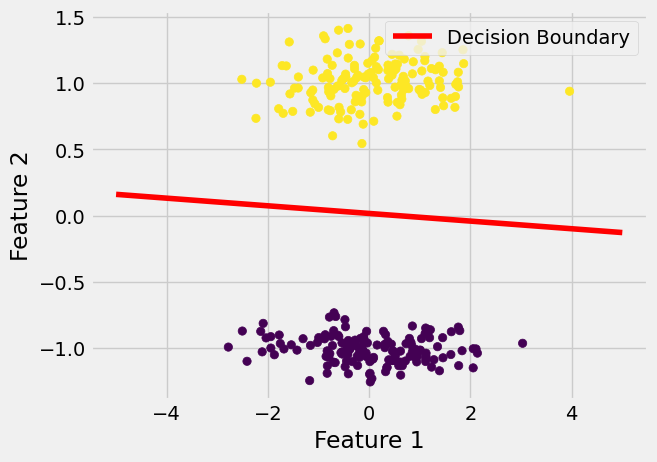

In [27]:
x1=np.array([-5,5])
x2=-(w[0][0]*x1+b)/w[0,1]
plt.plot(x1,x2,'r',label='Decision Boundary')
plt.scatter(features[:,0], features[:,1], c=targets)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper right')
plt.show()

In [29]:
with torch.no_grad():
  out=model(test_inputs)
  predictions=(out>=0.5).float()
  accuracy = ((predictions == test_targets).sum() / test_targets.shape[0]).item()
  print('Test Accuracy: {:.4f}'.format(accuracy*100))

Test Accuracy: 100.0000
